In [102]:
import torch
import numpy as np

In [103]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
x_data_2  = torch.from_numpy(np.array(data))
x_data

tensor([[1, 2],
        [3, 4]])

In [104]:
x_ones = torch.ones_like(x_data)
print(x_ones)

tensor([[1, 1],
        [1, 1]])


In [105]:
x_rand = torch.rand_like(x_data, dtype = torch.float)
x_rand

tensor([[0.2876, 0.1074],
        [0.6392, 0.4132]])

In [106]:
shape = (2,3,)
rand_tensor = torch.rand(shape, dtype = torch.float)
print(rand_tensor)

print(f"Shape of tensor: {rand_tensor.shape}")
print(f"Datatype of tensor: {rand_tensor.dtype}")
print(f"Device tensor is stored on: {rand_tensor.device}")
      

tensor([[0.2255, 0.9228, 0.6286],
        [0.8828, 0.1125, 0.8596]])
Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [107]:
#move to cuda
if torch.cuda.is_available():
    rand_tensor =rand_tensor.to('cuda')
    print(rand_tensor.device)

cuda:0


In [108]:
#indexing like numpy
rand_tensor[:,1]

tensor([0.9228, 0.1125], device='cuda:0')

In [109]:
tensor_1 = torch.cat([rand_tensor]*3, dim=1)
print(tensor_1)

tensor([[0.2255, 0.9228, 0.6286, 0.2255, 0.9228, 0.6286, 0.2255, 0.9228, 0.6286],
        [0.8828, 0.1125, 0.8596, 0.8828, 0.1125, 0.8596, 0.8828, 0.1125, 0.8596]],
       device='cuda:0')


In [110]:
#multiplication element_wise
tensor_1 *tensor_1 

tensor([[0.0508, 0.8516, 0.3952, 0.0508, 0.8516, 0.3952, 0.0508, 0.8516, 0.3952],
        [0.7794, 0.0127, 0.7389, 0.7794, 0.0127, 0.7389, 0.7794, 0.0127, 0.7389]],
       device='cuda:0')

In [111]:
#matrix multiply
tensor_1.matmul(tensor_1.T)

tensor([[3.8927, 2.5297],
        [2.5297, 4.5929]], device='cuda:0')

In [112]:
#In place operation have _ at the end => do not usse
tensor_1.add_(5)


tensor([[5.2255, 5.9228, 5.6286, 5.2255, 5.9228, 5.6286, 5.2255, 5.9228, 5.6286],
        [5.8828, 5.1125, 5.8596, 5.8828, 5.1125, 5.8596, 5.8828, 5.1125, 5.8596]],
       device='cuda:0')

# Torch Autograd

In [113]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)

In [114]:
prediction = model(data)

In [115]:
loss = (prediction - labels).sum()
loss.backward() #autograd calculate and stores the gradiends in the .grad


In [116]:
optim = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum= 0.9)


In [117]:
optim.step()

In [118]:
# Diferentiation in Autograd

In [119]:

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
q = 3*a**3 -b**2

In [120]:
q.shape

torch.Size([2])

In [121]:
external_grad = torch.tensor([1., 1.])
q.backward(gradient=external_grad)

In [122]:
a.grad == 9*a**2


tensor([True, True])

In [123]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False
model.fc = nn.Linear(512, 10)
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# Neural Networks

Typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)

- Iterate over a dataset of inputs

- Process input through the network

- Compute the loss (how far is the output from being correct)

- Propagate gradients back into the network’s parameters

- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient



In [157]:
# old style Network
import torch 
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output
net = LeNet()
print(net)


LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [125]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [126]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)
net.zero_grad()
out.backward(torch.randn(1, 10))

tensor([[ 0.1427, -0.1227,  0.1323,  0.0674, -0.0844, -0.1731, -0.1411,  0.0111,
          0.0499,  0.1022]], grad_fn=<AddmmBackward0>)


# Loss

In [132]:
# output = net(input)
# target = torch.randn(10)  # a dummy target, for example
# target = target.view(1, -1)  # make it the same shape as output
# criterion = nn.MSELoss()

# loss = criterion(output, target)
# print(loss)

tensor(1.8921, grad_fn=<MseLossBackward0>)


In [134]:
# # Backprop 

# net.zero_grad()     # zeroes the gradient buffers of all parameters

# print('conv1.bias.grad before backward')
# print(net.conv1.bias.grad)

# loss.backward()

# print('conv1.bias.grad after backward')
# print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0152,  0.0035, -0.0090, -0.0128, -0.0251,  0.0010])


In [135]:
#update weights
# learning_rate = 0.01
# for f in net.parameters():
#     f.data.sub_(f.grad.data * learning_rate)

In [137]:
import torch.optim as optim

input = torch.randn((1,1,32,32))
target = torch.randn((1,10))

#choose loss(criterion)
criterion = torch.nn.MSELoss()

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input) #one stept forward
loss = criterion(output, target) #estimate loss
loss.backward()
optimizer.step()    # Does the update


In [154]:
net_new = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d((2,2)),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10))
print(net_new)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)


In [128]:
im_tensor_1 = torch.randn((1, 1,32,32)) #image 64*64
im_tensor_2 = im_tensor_1.clone()

In [147]:
net.zero_grad()
net_new.zero_grad()
out_1 = net(im_tensor_1)
out_2 = net_new(im_tensor_2)


In [148]:
out_1

tensor([[ 0.1452, -0.0650,  0.1464,  0.0501, -0.0544, -0.1961, -0.1308,  0.0082,
          0.0647,  0.0964]], grad_fn=<AddmmBackward0>)

In [149]:
out_2

tensor([[-0.0185,  0.0638,  0.0316, -0.0826, -0.0668, -0.0064,  0.1182,  0.0401,
         -0.0740, -0.0275]], grad_fn=<AddmmBackward0>)

# Import Data

In [152]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [01:41<00:00, 1683631.17it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


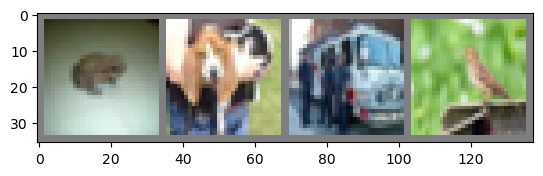

frog  dog   truck bird 


In [153]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [160]:
#train

#choose loss(criterion)  and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # in your training loop:
        optimizer.zero_grad()   # zero the gradient buffers
        
        #forward , back, optimize
        outputs = net(inputs) #one stept forward
        loss = criterion(outputs, labels) #estimate loss
        loss.backward()
        optimizer.step()    # Does the update
        #print statistice
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('End training')

[1,  2000] loss: 2.211
[1,  4000] loss: 1.833
[1,  6000] loss: 1.674
[1,  8000] loss: 1.578
[1, 10000] loss: 1.509
[1, 12000] loss: 1.465
[2,  2000] loss: 1.416
[2,  4000] loss: 1.380
[2,  6000] loss: 1.339
[2,  8000] loss: 1.300
[2, 10000] loss: 1.304
[2, 12000] loss: 1.292
End training


In [163]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

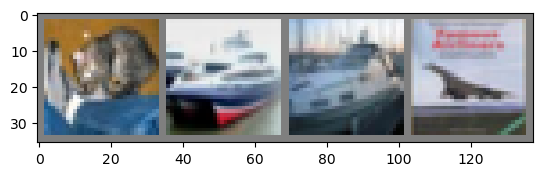

GroundTruth:  cat   ship  ship  plane


In [162]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [179]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


In [172]:
device = 'cpu'
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)

In [168]:
#train

#choose loss(criterion)  and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net_new.parameters(), lr=0.01)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # in your training loop:
        optimizer.zero_grad()   # zero the gradient buffers
        
        #forward , back, optimize
        outputs = net_new(inputs) #one stept forward
        loss = criterion(outputs, labels) #estimate loss
        loss.backward()
        optimizer.step()    # Does the update
        #print statistice
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('End training')

[1,  2000] loss: 2.196
[1,  4000] loss: 1.826
[1,  6000] loss: 1.648
[1,  8000] loss: 1.553
[1, 10000] loss: 1.491
[1, 12000] loss: 1.476
[2,  2000] loss: 1.396
[2,  4000] loss: 1.372
[2,  6000] loss: 1.353
[2,  8000] loss: 1.327
[2, 10000] loss: 1.278
[2, 12000] loss: 1.261
End training


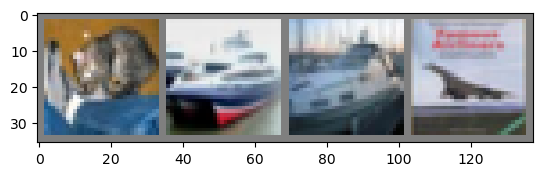

GroundTruth:  cat   ship  ship  plane
tensor([3, 0, 1, 8])
Predoit:  cat   plane car   ship 


In [178]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
outputs = net(images)
outputs = torch.max(outputs.data, 1).indices
print(outputs)
print('Predoit: ', ' '.join(f'{classes[outputs[j]]:5s}' for j in range(4)))

In [180]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net_new(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 52 %
